# Mastering Bank Churn Prediction: Practical Insights into Preprocessing, Model Building, and Predictive Modeling.¶
In the world of banking, one of the biggest challenges is keeping customers happy and staying with the bank. It's way cheaper to retain existing customers than to acquire new ones. But sometimes, customers decide to leave, and banks want to know why. That's where this project comes in. We're using smart computer methods to figure out when customers might leave.

We start by looking at all the data the bank has collected over time. Then, we clean it up and identify the most important parts. We use data cleaning to ensure the information is accurate and ready for analysis. After that, we employ clever techniques like feature engineering to extract the most useful bits of data. This helps us uncover patterns and trends that might predict if a customer will leave or not.

Once we've got everything prepared, we're building machine learning models using simple but effective methods to predict which customers might leave the bank. But we're not stopping there. We're also testing these models with separate data to ensure their efficiency. By doing all this, we hope to provide banks with the tools they need to keep their customers happy and loyal for the long haul.

# Reading and Analyzing Bank Customer Churn Data.¶
Before we start our analysis, first, we need to view the dataset. It is essential to view the data and check the columns. Let's take a look.

In [1]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset ----
df = pd.read_csv("./churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7496,15589541,Sutherland,557,France,Female,27,2,0.00,2,0,1,4497.55,0
7496,7497,15608804,Allan,824,Germany,Male,49,8,133231.48,1,1,1,67885.37,0
7497,7498,15645820,Folliero,698,France,Male,27,7,0.00,2,1,0,111471.55,0
7498,7499,15659031,Mordvinova,630,France,Female,36,8,126598.99,2,1,1,134407.93,0


# Counting Null Values in the Data.
Great!!! We have our dataset loaded. Now, we need to ensure that the dataset does not contain any null values. So, let's check for null values in our dataset.

In [2]:
null_values = df.isnull().sum()

#--- Inspect data ---
null_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Counting Duplicates.
Wow!!! Our dataset does not have any null values. Now, we need to ensure that the data does not contain any duplicates. Checking for duplicate rows is crucial for maintaining data accuracy. Let's go ahead and check for them.

In [3]:
duplicates = df.duplicated().sum()

#--- Inspect data ---
duplicates

0

# Exited Customer Distribution Analysis.
Incredible!!! We have successfully verified that there are no duplicates. Now, we need to check the distribution of 'Exited' customers in our dataset. Let's proceed to check it.

In [4]:
values = df["Exited"].value_counts()
#--- Inspect data ---
values

Exited
0    5954
1    1546
Name: count, dtype: int64

# Removing Unnecessary Columns.
Fantastic!!! After found out the distribution. Now, we need to drop irrelevant columns. This action will enhance the clarity and focus of our data analysis process. Let's work on it.

In [5]:
columns_to_remove = ["RowNumber", "CustomerId", "Surname"]

# Use the drop() function to remove the specified columns
df = df.drop(columns_to_remove, axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,557,France,Female,27,2,0.00,2,0,1,4497.55,0
7496,824,Germany,Male,49,8,133231.48,1,1,1,67885.37,0
7497,698,France,Male,27,7,0.00,2,1,0,111471.55,0
7498,630,France,Female,36,8,126598.99,2,1,1,134407.93,0


# Categorizing Dataset Columns.
Great!!! We've successfully removed the columns. Now, we're categorizing the columns into numerical and nominal types. This categorization facilitates targeted exploration and manipulation of data based on their respective natures. Let's take a look.

In [6]:
numbCol =['EstimatedSalary', 'Balance', 'CreditScore', 'Age']
nomCol = [ 'HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'NumOfProducts', 'Tenure']

#--- Inspect data ---
print(f"Numerical columns are {numbCol}")
print(f"Categorical columns are {nomCol}")

Numerical columns are ['EstimatedSalary', 'Balance', 'CreditScore', 'Age']
Categorical columns are ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'NumOfProducts', 'Tenure']


# Outlier Detection Analysis.
Great progress so far! We have categorized the columns. Now, we aim to identify outliers within our dataset. By doing this, we can facilitate robust data cleansing and analysis strategies. So, let's check it.

In [7]:
from scipy import stats

# Define the threshold for outlier detection
threshold = 3

# Create a dictionary to store the count of outliers for each column
outlier_counts = {}

# Iterate over each numerical column
for col in numbCol:
# Calculate Z-scores for the current column
    z_scores = stats.zscore(df[col])
    outliers = (abs(z_scores) > threshold)  
# Find outliers
    
# Count the number of outliers for the current column
    num_outliers = outliers.sum()

# Store the count of outliers for the current column in the dictionary
    outlier_counts[col] = num_outliers

print(f"Colums with outliers and their counts\n{outlier_counts}")

Colums with outliers and their counts
{'EstimatedSalary': 0, 'Balance': 0, 'CreditScore': 5, 'Age': 99}


# Task 8: Age Data Integrity Check.
Ohhhhh!!! We've found outliers in two columns. Before removing them, we need to ensure that it's okay to drop them. Because age can be any number, although we set one limit and check for real outliers. This examination is crucial for maintaining data integrity and reliability in subsequent analyses. Let's take a look.

In [8]:
ages_check = len(df[(df['Age'] > 100) | (df['Age'] < 1)])

# The variable ages_check now contains the count of rows with potentially incorrect age values

print(f"Age rows with incorrect value = {ages_check}")

Age rows with incorrect value = 0


# Task 9: Credit Score Data Integrity Check.
Wow!!! We have no real outliers in the Age column. Now, we need to check the credit score. Here, our industry knowledge comes into play because the credit score typically ranges from 300 to 900. By doing this, we ensure that we do not remove any valid data. Let's work on it.

In [9]:
credit_check = len(df[(df['CreditScore'] > 900) | (df['CreditScore'] < 300)])

# The variable ages_check now contains the count of rows with potentially incorrect age values
print(f"Credit rows with incorrect value = {credit_check}")

Credit rows with incorrect value = 0


# Converting Estimated Salary and Balance to Integer Data Type.
Fantastic!!! There are no real outliers in the credit score column either. Now, we need to change the columns from float to integer values. By doing this, we gain a better understanding from a broader perspective. Let's convert them.

In [10]:
df["EstimatedSalary"] = df["EstimatedSalary"].astype(int)
df["Balance"] = df["Balance"].astype(int)

# Label Encoding for Categorical Data.
Amazing!!! We've changed the columns successfully. Now, we need to change the words of the categories into numbers. This helps us to better understand and analyze the data. Let's do it.

In [11]:
from sklearn.preprocessing import LabelEncoder

encode_list = ['Geography', 'Gender']

model = LabelEncoder()

for col in encode_list:
    df[col] = model.fit_transform(df[col])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,557,0,0,27,2,0,2,0,1,4497,0
7496,824,1,1,49,8,133231,1,1,1,67885,0
7497,698,0,1,27,7,0,2,1,0,111471,0
7498,630,0,0,36,8,126598,2,1,1,134407,0


# Percentage of Churned Customers based on Credit Card Ownership.
Great!!! We've successfully completed the conversion. Now, we need to check how the column relates to the 'Exited' column. This analysis helps us understand how credit card services affect customer retention strategies. Let's get started.

In [12]:
credit_churn_percentage = df.groupby('HasCrCard')['Exited'].mean() * 100
credit_churn_percentage

HasCrCard
0    21.246078
1    20.345417
Name: Exited, dtype: float64

# Removing Credit Card Ownership Column.
Ohh!!! We found out that credit card services have no impact on customer retention. Let's go ahead and drop the column.

In [13]:
df = df.drop(["HasCrCard"], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,101348,1
1,608,2,0,41,1,83807,1,1,112542,0
2,502,0,0,42,8,159660,3,0,113931,1
3,699,0,0,39,1,0,2,0,93826,0
4,850,2,0,43,2,125510,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...
7495,557,0,0,27,2,0,2,1,4497,0
7496,824,1,1,49,8,133231,1,1,67885,0
7497,698,0,1,27,7,0,2,0,111471,0
7498,630,0,0,36,8,126598,2,1,134407,0


# Standardizing Numerical Data with StandardScaler.
Wow!!! We have successfully removed the column. Now, we need to standardize numerical data within our dataset. This preprocessing step enhances the consistency and comparability of numerical attributes, making modeling and analysis processes more effective downstream. Let's proceed.

In [14]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
sc_model = StandardScaler()

# Fit StandardScaler to all numerical columns in the training DataFrame
sc_model.fit(df[numbCol])
df[numbCol] = sc_model.transform(df[numbCol])

# Splitting Data into Features and Target Variable.
Fantastic!!! We have successfully standardized the data. Now, we need to split it. This division allows for distinct handling of predictors and the variable to be predicted, making supervised learning tasks easier. Let's get started.

In [15]:
x1 = df.drop(["Exited"], axis=1)
y1 = df["Exited"]

# Oversampling Minority Class with SMOTE.
Incredible!!! We have successfully divided the data. Now, we need to oversample the data to handle the imbalance. By doing this, we'll increase the representation of the minority class, ensuring a balanced distribution of classes. Let's get started.

In [16]:
from imblearn.over_sampling import SMOTE

over = SMOTE(sampling_strategy=1)

# Apply SMOTE to oversample the minority class
x1_resampled, y1_resampled = over.fit_resample(x1.values, y1.values)

# Splitting Oversampled Data for Training and Testing.
Great!!! We have balanced the data. Now, we need to split it into training and testing sets. This division ensures an independent dataset for model validation, which facilitates accurate performance assessment and estimation of generalization capability. Let's proceed.

In [17]:
from sklearn.model_selection import train_test_split

# Assuming x1_resampled and y1_resampled are your features and target after oversampling

x_train, x_test, y_train, y_test = train_test_split(x1_resampled, y1_resampled, test_size=0.2, random_state=42)

# Model Evaluation: Logistic Regression.
Wowww!!! We have split the data. Now, we need to build the logistic model and check the accuracy score. This evaluation step is crucial for gauging the predictive power of the Logistic Regression model in our classification task. Let's build it.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()

logistic_regression.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression.predict(x_test)

# Evaluate the model's performance using accuracy_score
accuracy1 = accuracy_score(y_test, y_pred_lr)
accuracy1

0.7115869017632241

# Model Evaluation: Support Vector Machine (SVM).
Great!!! We have successfully build the logistic model. Now, we need to build the SVM and check the accuracy score. This evaluation step is crucial for gauging the predictive power of the SVM model in our classification task. Let's build it.

In [19]:
from sklearn.svm import SVC

svm_classifier = SVC()

svm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the model's performance using accuracy_score
accuracy2 = accuracy_score(y_test, y_pred_svm)
accuracy2

0.7686817800167927

# Model Evaluation: Random Forest Classifier.
Fantastic!!! We have successfully build the SVM model. Now, we need to build the Random Forest model and check the accuracy score. This evaluation step is crucial for gauging the predictive power of the Random Forest Classifier model in our classification task. Let's build it.

In [20]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier_model = RandomForestClassifier()

RandomForestClassifier_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = RandomForestClassifier_model.predict(x_test)

# Evaluate the model's performance using accuracy_score
accuracy3 = accuracy_score(y_test, y_pred)
accuracy3

0.9030226700251889

# Evaluation Metrics: Precision, Recall, and F1 Score.
Great!!! Since we found better accuracy with the Random Forest Classifier model among the three models we considered, let's proceed to evaluate its performance using other metrics.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

precision, recall, f1

(0.9106047326906223, 0.889554794520548, 0.8999566912083153)

# Hyperparameter Tuning with Randomized Search: Random Forest.
Incredible!!! We've obtained the remaining metrics. Now, let's fine-tune the model to improve its performance. Let's get started!

In [46]:
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['sqrt', 'log2', None]
max_depth = [None, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have defined your parameter grid as param_grid

# Instantiate the RandomizedSearchCV class
rf_RandomGrid = RandomizedSearchCV(estimator=RandomForestClassifier_model, param_distributions=param_grid, cv=5, verbose=0, n_jobs=4, random_state=42)

# Fit the RandomizedSearchCV to the training data
rf_RandomGrid.fit(x_train, y_train)

# Make predictions on the test data using the best estimator found by RandomizedSearchCV
y_pred1 = rf_RandomGrid.best_estimator_.predict(x_test)

# Calculate evaluation metrics
accuracy4 = accuracy_score(y_test, y_pred1)
precision4 = precision_score(y_test, y_pred1)
recall4 = recall_score(y_test, y_pred1)
f1_4 = f1_score(y_test, y_pred1)

print(f" Accuracy = {accuracy4}\n Precision = {precision4}\n Recall = {recall4}\n F1_Score = {f1_4}")

 Accuracy = 0.9017632241813602
 Precision = 0.9110915492957746
 Recall = 0.8861301369863014
 F1_Score = 0.8984375


# Feature Importance Analysis: Random Forest Model.
Wow!!! We've fine-tuned the model. Now, let's determine the importance of the columns in our dataset. Let's proceed to do that.

In [32]:
# Retrieve the best estimator found by RandomizedSearchCV
best_rf_model = rf_RandomGrid.best_estimator_

# Get the feature importances
feature_importances = best_rf_model.feature_importances_

# Get the feature names from the original DataFrame
feature_names = df.drop(columns=['Exited']).columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
3,Age,0.269966
6,NumOfProducts,0.209628
5,Balance,0.097281
7,IsActiveMember,0.086176
8,EstimatedSalary,0.079543
0,CreditScore,0.078496
2,Gender,0.060370
4,Tenure,0.059325
1,Geography,0.059215


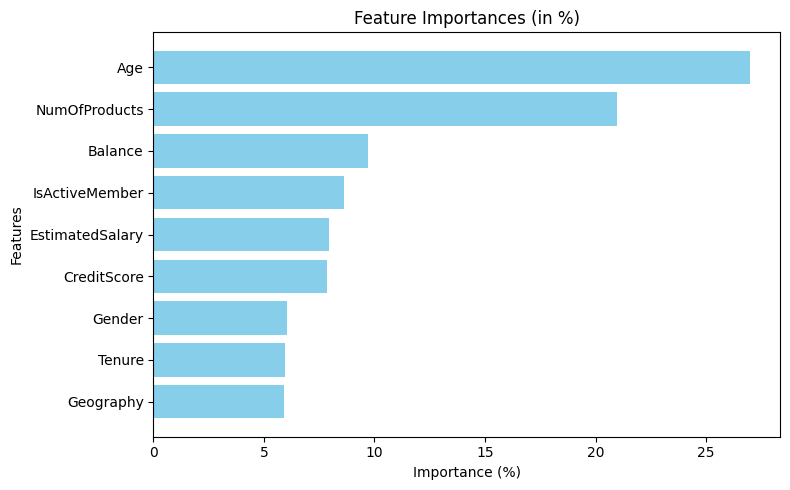

In [44]:
import matplotlib.pyplot as plt

feature_importances = {
    'Age': 0.269966,
    'NumOfProducts': 0.209628,
    'Balance': 0.097281,
    'IsActiveMember': 0.086176,
    'EstimatedSalary': 0.079543,
    'CreditScore': 0.078496,
    'Gender': 0.060370,
    'Tenure': 0.059325,
    'Geography': 0.059215
}

# 1. Sum the raw importance values
total_importance = sum(feature_importances.values())

# 2. Convert each raw importance to a percentage of the total
percent_importances = {}
for feature, importance in feature_importances.items():
    percent_importances[feature] = (importance / total_importance) * 100

# 3. Sort the dictionary by percentage (descending)
sorted_importances = dict(
    sorted(percent_importances.items(), key=lambda x: x[1], reverse=True)
)

# 4. Separate the keys (features) and values (importances in %)
features = list(sorted_importances.keys())
importances_percent = list(sorted_importances.values())

# 5. Create a bar chart
plt.figure(figsize=(8, 5))
plt.barh(features, importances_percent, color='skyblue')
plt.gca().invert_yaxis()  # So the highest importance feature is at the top
plt.title('Feature Importances (in %)')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# In this project 
We explored a comprehensive workflow to predict bank customer churn and gained invaluable insights into why customers leave. Through data preprocessing (cleaning, outlier detection, feature engineering), model building (Logistic Regression, SVM, and Random Forest), and performance evaluation (accuracy, precision, recall, F1-score), we identified that Random Forest delivered the best predictive power. By optimizing hyperparameters and managing class imbalance via SMOTE, we further refined model performance. Ultimately, this solution empowers banks with actionable insights to retain high-risk customers, optimize resource allocation, and drive long-term loyalty. 

This project serves as a foundation for building more robust, data-driven strategies to reduce customer attrition in the banking sector.